In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
%matplotlib inline

df = pd.read_csv('data.csv')

In [2]:
df = df.drop('Unnamed: 32', axis=1)

In [3]:
df = df.drop('id', axis = 1)

In [4]:
df['diagnosis'] = df['diagnosis'].replace(['M', 'B'], [1,0])

In [5]:
class Model(nn.Module):
    def __init__(self, in_features=30, h1=13, h2=15, h3 = 10, out_features=2):
        super().__init__()
        
        # input layer -> 1 hidden -> 2 hidden -> output 
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.fc3 = nn.Linear(h2, h3)            # hidden layer
        self.out = nn.Linear(h3, out_features)  # output layer
        
    def forward(self, x):
        # Pass the neuron input through its activation function to obtain the output of the neuron
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        return x

In [6]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [7]:
model = Model()

In [8]:
criterion = nn.CrossEntropyLoss() # CrossEntropy does not need one hot encoding
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [9]:
epochs = 100 # number of runs through the training data
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad() #zero-grad to not accomulate the gradient over the epochs
    loss.backward()
    optimizer.step()

epoch:  1  loss: 2.20097756
epoch: 11  loss: 0.46095777
epoch: 21  loss: 0.25409105
epoch: 31  loss: 0.20364757
epoch: 41  loss: 0.19536978
epoch: 51  loss: 0.18292333
epoch: 61  loss: 0.17422704
epoch: 71  loss: 0.20319961
epoch: 81  loss: 0.17763655
epoch: 91  loss: 0.15645792


tensor(0.1520, grad_fn=<NllLossBackward>)


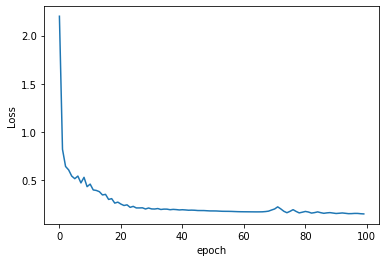

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');
print(losses[-1])

In [11]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.21600157


In [12]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-7.8742, -1.2721])              1
 2. tensor([-1.3130, -4.6582])              0
 3. tensor([-1.0213, -4.9825])              0
 4. tensor([-2.9558, -5.5949])              0
 5. tensor([-3.9474, -3.5512])              0
 6. tensor([-4.0169, -3.9932])              0
 7. tensor([-1.0438, -6.3037])              0
 8. tensor([-0.8091, -5.7496])              0
 9. tensor([-1.0149, -6.5501])              0
10. tensor([-0.1179, -4.7702])              0
11. tensor([-0.4787, -4.7233])              0
12. tensor([-4.7310,  1.2649])              1
13. tensor([-0.1160, -5.1227])              0
14. tensor([-2.9937, -3.1223])              1
15. tensor([-1.6158, -4.4075])              0
16. tensor([-5.5938, -1.0443])              1
17. tensor([-2.0081, -4.8242])              0
18. tensor([-1.6239, -5.9195])              0
19. tensor([-0.3896, -4.4534])              0
20. tensor([-3.1768, -5.3305])              0
21. tensor([-3.2055, -1.8226])              1
22. tensor([-0.0618, -4.4015])    